# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

C:\Program Files\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Program Files\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Program Files\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Program Files\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

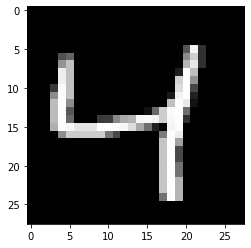

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Training

In [5]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6932
Epoch: 1/20... Training loss: 0.6901
Epoch: 1/20... Training loss: 0.6869
Epoch: 1/20... Training loss: 0.6832
Epoch: 1/20... Training loss: 0.6783
Epoch: 1/20... Training loss: 0.6727
Epoch: 1/20... Training loss: 0.6652
Epoch: 1/20... Training loss: 0.6580
Epoch: 1/20... Training loss: 0.6479
Epoch: 1/20... Training loss: 0.6378
Epoch: 1/20... Training loss: 0.6257
Epoch: 1/20... Training loss: 0.6138
Epoch: 1/20... Training loss: 0.5987
Epoch: 1/20... Training loss: 0.5835
Epoch: 1/20... Training loss: 0.5640
Epoch: 1/20... Training loss: 0.5502
Epoch: 1/20... Training loss: 0.5335
Epoch: 1/20... Training loss: 0.5136
Epoch: 1/20... Training loss: 0.4997
Epoch: 1/20... Training loss: 0.4806
Epoch: 1/20... Training loss: 0.4646
Epoch: 1/20... Training loss: 0.4470
Epoch: 1/20... Training loss: 0.4315
Epoch: 1/20... Training loss: 0.4109
Epoch: 1/20... Training loss: 0.3996
Epoch: 1/20... Training loss: 0.3865
Epoch: 1/20... Training loss: 0.3754
E

Epoch: 1/20... Training loss: 0.1803
Epoch: 1/20... Training loss: 0.1852
Epoch: 1/20... Training loss: 0.1836
Epoch: 1/20... Training loss: 0.1822
Epoch: 1/20... Training loss: 0.1818
Epoch: 1/20... Training loss: 0.1895
Epoch: 1/20... Training loss: 0.1855
Epoch: 1/20... Training loss: 0.1832
Epoch: 1/20... Training loss: 0.1846
Epoch: 1/20... Training loss: 0.1754
Epoch: 1/20... Training loss: 0.1824
Epoch: 1/20... Training loss: 0.1852
Epoch: 1/20... Training loss: 0.1802
Epoch: 1/20... Training loss: 0.1816
Epoch: 1/20... Training loss: 0.1793
Epoch: 1/20... Training loss: 0.1847
Epoch: 1/20... Training loss: 0.1814
Epoch: 1/20... Training loss: 0.1779
Epoch: 1/20... Training loss: 0.1757
Epoch: 1/20... Training loss: 0.1870
Epoch: 1/20... Training loss: 0.1777
Epoch: 2/20... Training loss: 0.1808
Epoch: 2/20... Training loss: 0.1825
Epoch: 2/20... Training loss: 0.1787
Epoch: 2/20... Training loss: 0.1773
Epoch: 2/20... Training loss: 0.1744
Epoch: 2/20... Training loss: 0.1750
E

Epoch: 2/20... Training loss: 0.1576
Epoch: 2/20... Training loss: 0.1507
Epoch: 2/20... Training loss: 0.1511
Epoch: 2/20... Training loss: 0.1581
Epoch: 2/20... Training loss: 0.1465
Epoch: 2/20... Training loss: 0.1531
Epoch: 2/20... Training loss: 0.1492
Epoch: 2/20... Training loss: 0.1476
Epoch: 2/20... Training loss: 0.1494
Epoch: 2/20... Training loss: 0.1546
Epoch: 2/20... Training loss: 0.1431
Epoch: 2/20... Training loss: 0.1504
Epoch: 2/20... Training loss: 0.1567
Epoch: 2/20... Training loss: 0.1504
Epoch: 2/20... Training loss: 0.1532
Epoch: 2/20... Training loss: 0.1525
Epoch: 2/20... Training loss: 0.1477
Epoch: 2/20... Training loss: 0.1526
Epoch: 2/20... Training loss: 0.1536
Epoch: 2/20... Training loss: 0.1530
Epoch: 2/20... Training loss: 0.1529
Epoch: 2/20... Training loss: 0.1511
Epoch: 2/20... Training loss: 0.1457
Epoch: 2/20... Training loss: 0.1519
Epoch: 2/20... Training loss: 0.1508
Epoch: 2/20... Training loss: 0.1529
Epoch: 2/20... Training loss: 0.1463
E

Epoch: 3/20... Training loss: 0.1351
Epoch: 3/20... Training loss: 0.1333
Epoch: 3/20... Training loss: 0.1317
Epoch: 3/20... Training loss: 0.1316
Epoch: 3/20... Training loss: 0.1351
Epoch: 3/20... Training loss: 0.1343
Epoch: 3/20... Training loss: 0.1320
Epoch: 3/20... Training loss: 0.1302
Epoch: 3/20... Training loss: 0.1297
Epoch: 3/20... Training loss: 0.1317
Epoch: 3/20... Training loss: 0.1389
Epoch: 3/20... Training loss: 0.1330
Epoch: 3/20... Training loss: 0.1292
Epoch: 3/20... Training loss: 0.1327
Epoch: 3/20... Training loss: 0.1343
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1329
Epoch: 3/20... Training loss: 0.1335
Epoch: 3/20... Training loss: 0.1311
Epoch: 3/20... Training loss: 0.1286
Epoch: 3/20... Training loss: 0.1349
Epoch: 3/20... Training loss: 0.1263
Epoch: 3/20... Training loss: 0.1270
Epoch: 3/20... Training loss: 0.1325
Epoch: 3/20... Training loss: 0.1369
Epoch: 3/20... Training loss: 0.1323
Epoch: 3/20... Training loss: 0.1317
E

Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1151
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1166
Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1190
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1173
Epoch: 4/20... Training loss: 0.1201
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1147
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1144
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1199
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1145
Epoch: 4/20... Training loss: 0.1149
Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1209
E

Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1062
Epoch: 5/20... Training loss: 0.1137
Epoch: 5/20... Training loss: 0.1138
Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1069
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1065
Epoch: 5/20... Training loss: 0.1119
E

Epoch: 6/20... Training loss: 0.1010
Epoch: 6/20... Training loss: 0.1018
Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1081
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1022
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1005
Epoch: 6/20... Training loss: 0.1020
E

Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.1052
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1005
E

Epoch: 8/20... Training loss: 0.1037
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.1017
Epoch: 8/20... Training loss: 0.0946
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.1020
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.1008
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0939
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0979
E

Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0949
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0936
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0943
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0937
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.1000
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0965
E

Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0919
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0994
Epoch: 9/20... Training loss: 0.1017
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0938
Epoch: 9/20... Training loss: 0.0899
Epoch: 9/20... Training loss: 0.0939
Epoch: 9/20... Training loss: 0.1002
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0938
Epoch: 9/20... Training loss: 0.0994
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0961
E

Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0914
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0989
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0926
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0992
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0917
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0989
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0918
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0984
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0993
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0896
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0973
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0976
Epoch: 12/20... Training loss: 0.0988
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0910
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0908
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0900
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0969
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0980
Epoch: 13/20... Training loss: 0.0915
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0981
Epoch: 13/20... Training loss: 0.0905
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0895
Epoch: 13/20... Training loss: 0.0906
Epoch: 13/20... Training loss: 0.0898
Epoch: 13/20... Training loss: 0.0971
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0972
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0981
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.1021
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0907
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0974
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0970
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0973
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0967
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0902
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0969
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0898
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0986
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0902
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0906
Epoch: 17/20... Training loss: 0.0974
Epoch: 17/20... Training loss: 0.0904
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0969
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0969
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0907
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0900
Epoch: 17/20... Training loss: 0.0895
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0967
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0890
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0903
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0974
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0873
Epoch: 18/20... Training loss: 0.0904
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0902
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0887
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0906
Epoch: 19/20... Training loss: 0.0885
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0977
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0904
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0900
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

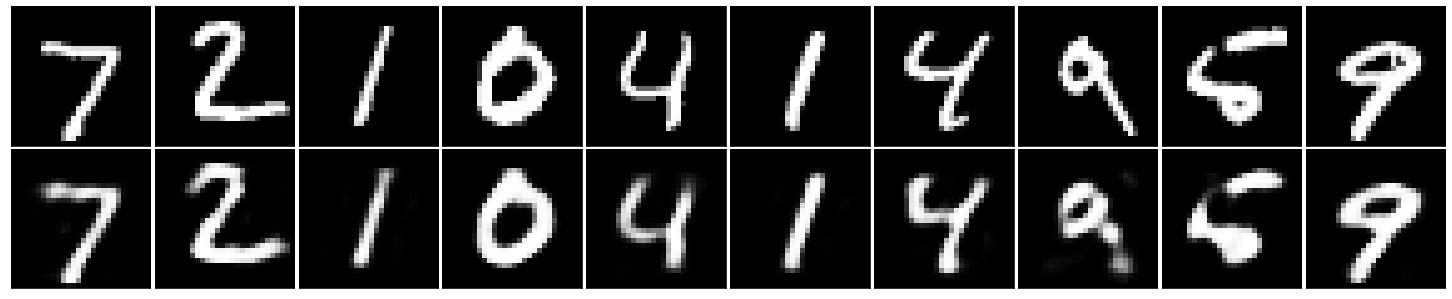

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [8]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.